In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def slice_time(CE_all):
    
    ''' This function return a list of array that contains the CE in each un-averaged run'''
    
    t_all = CE_all[:,0]
    CE_list = []
    
    i0 = 0
    i1 = 0
    
    for i in range(len(t_all)-1):
        if t_all[i+1] < t_all[i]:
            i1 = i+1
            CE_list.append(CE_all[i0:i1,:])
            i0 = i1
            
    return CE_list


    

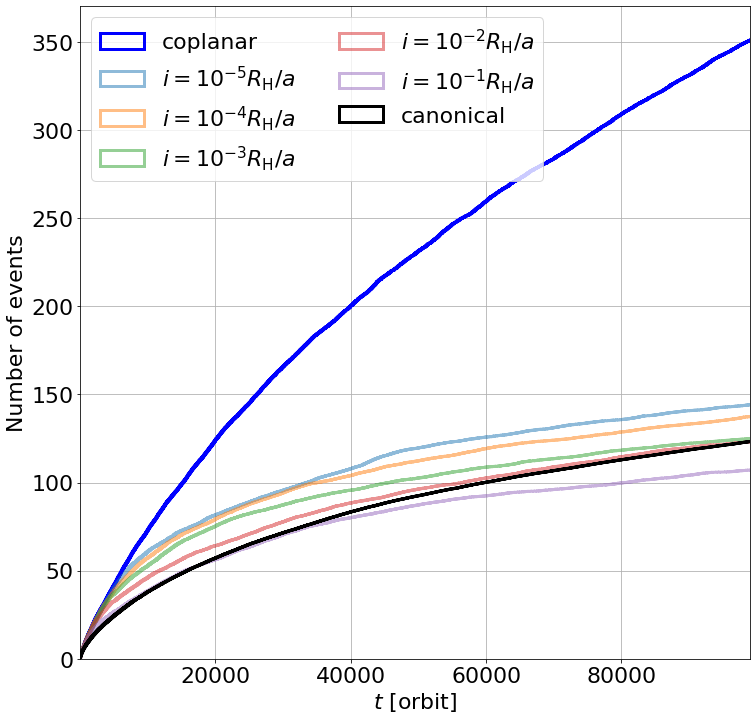

In [5]:
## 
##  Read the data for canonical runs
##

RH = (1e-5)**(1./3.)

can_CE0 = np.load('d:/_work/BBH-data_use/can_CE0.npy')
can_CE0_list = slice_time(can_CE0)
can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0-2000.npy')

can1_CE0 = np.load('d:/_work/BBH-data_use/can-1_CE0.npy')
can1_CE0_list = slice_time(can1_CE0)

can2_CE0 = np.load('d:/_work/BBH-data_use/can-2_CE0.npy')
can2_CE0_list = slice_time(can2_CE0)

can3_CE0 = np.load('d:/_work/BBH-data_use/can-3_CE0.npy')
can3_CE0_list = slice_time(can3_CE0)

can4_CE0 = np.load('d:/_work/BBH-data_use/can-4_CE0.npy')
can4_CE0_list = slice_time(can4_CE0)

can5_CE0 = np.load('d:/_work/BBH-data_use/can-5_CE0.npy')
can5_CE0_list = slice_time(can5_CE0)

canf_CE0 = np.load('d:/_work/BBH-data_use/can-flat_CE0.npy')
canf_CE0_list = slice_time(canf_CE0)

''' Need to add the flat run data to the this code. '''


##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$t$ [orbit]')
axs.set_ylabel(r'Number of events')
axs.set_xlim([1e0,0.99e5])

# parameters of the plot

nbins = 4001
t_bins = np.linspace(1e1,1e5,nbins)
nw = 1./200.
lw = 3
aluse = 0.5


# CE0

Nt_cp, bin_out, bar_out = axs.hist(canf_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=canf_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'coplanar',color='b')

axs.hist(can5_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can5_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-5}R_{\rm H}/a$',alpha=aluse)

axs.hist(can4_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can4_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-4}R_{\rm H}/a$',alpha=aluse)

axs.hist(can3_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can3_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-3}R_{\rm H}/a$',alpha=aluse)

axs.hist(can2_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can2_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-2}R_{\rm H}/a$',alpha=aluse)

axs.hist(can1_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can1_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-1}R_{\rm H}/a$',alpha=aluse)

nw = 1./2000.

axs.hist(can_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'canonical',color='k')


axs.legend(loc=2,ncol=2)
axs.grid()
axs.set_axisbelow(True)


##
##  Set the labels
##

#axs.text(0.1, 0.75,'CE0', ha='center', va='center', transform=axs.transAxes)


##  Save the figure

plt.savefig('./pics/pics-NCE-vs-t-inc.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-NCE-vs-t-inc.png',bbox_inches='tight',transparent=True)


352.45999999977374
[12.18460298  0.65246344]


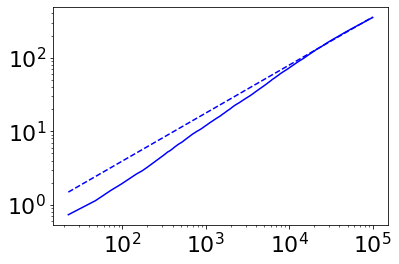

In [8]:
from scipy.optimize import curve_fit

def Nt(t, T0, beta):
    return (t/T0)**beta

t_mid = 0.5*(t_bins[1:]+t_bins[:-1])

popt, pcov = curve_fit(Nt, t_mid, Nt_cp, p0=np.array([Nt_cp[-1]/t_mid[-1],0.55]))
print(Nt_cp[-1])
print(popt)
plt.loglog(t_mid,Nt_cp,'b')
plt.loglog(t_mid,Nt(t_mid,popt[0],popt[1]),'b--')